# **Discovering Patterns in Credit Card Usage: An Unsupervised Clustering Analysis**

# Introduction:

This project focuses on customer segmentation using unsupervised learning techniques to analyze credit card usage patterns. By leveraging a dataset containing behavioral attributes of approximately 9,000 active credit cardholders over six months, this study aims to uncover distinct customer groups based on spending habits, payment behaviors, and credit usage. The analysis involves Exploratory Data Analysis (EDA) to inspect and clean the data, followed by the application of clustering algorithms such as K-Means, DBSCAN, and Agglomerative Clustering. Through this segmentation, the project seeks to provide actionable insights for targeted marketing strategies, personalized financial offerings, and better customer retention approaches. This exploration demonstrates the powerful role of data-driven clustering in identifying hidden patterns and driving business decisions.


# Dataset

This project utilizes the dataset **customer-segmentation** available on Kaggle. File path: (/kaggle/input/customer-segmentation/Customer_Data (1).csv)

Total size of the dataset (rows, columns): (8950, 18)

Number of rows: 8950

Number of columns: 18

Total data points: 161100

# GitHib Repository

https://github.com/PuttuHegdeCUBoulder/MachineLearning-UnsupervisedLearning.git

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation/Customer_Data (1).csv


In [2]:
# Core Libraries for Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries for Clustering and Metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the Dataset
data = pd.read_csv('/kaggle/input/customer-segmentation/Customer_Data (1).csv')

# Data Cleaning - Identify Invalid Values

Check if your dataset contains NaN, inf, or other invalid numerical entries

In [4]:
# Check for NaN values
print("Number of NaN values in each column:")
print(data.isnull().sum())

# Convert applicable columns to numeric, coercing errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')

print("Number of infinite values in each numeric column:")
print(np.isinf(data).sum())

print("Number of very large values (absolute > 1e6) in each column:")
print((data > 1e6).sum().sort_values(ascending=False))
print("Number of very small positive values (< 1e-6) in each column:")
print((data > 0).sum() - (data[data > 0] > 1e-6).sum())


Number of NaN values in each column:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
Number of infinite values in each numeric column:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES            

# Data Cleaning - Clean Invalid Values

Replace invalid values (e.g., NaN, inf) with appropriate substitutes like the column's median or mean.

In [5]:
# Replace infinity values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values (NaN) with the median of each column
data.fillna(data.median(numeric_only=True), inplace=True)

# Data Cleaning - Check Data Types

Some columns might contain unexpected data types (e.g., strings in numeric columns). Validate and convert them:

In [6]:
# Check data types
print("Column Data Types:")
print(data.dtypes)

# Convert columns to numeric if necessary
for col in data.select_dtypes(include=['object']).columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    except Exception as e:
        print(f"Error converting column {col} to numeric: {e}")


Column Data Types:
CUST_ID                             float64
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


# Data Cleaning - Handle Duplicates

In [7]:
# Check for duplicates
print("Number of duplicate rows:", data.duplicated().sum())

# Drop duplicates
data.drop_duplicates(inplace=True)

Number of duplicate rows: 0


# Data Inspection

Perform basic data inspection to see the Sample Data, Column Names, Data Types, Column Sizes and Data Size.

In [8]:
# Dataset dimensions
print("Total size of the dataset (rows, columns):", data.shape)

total_rows, total_columns = data.shape
print("Number of rows:", total_rows)
print("Number of columns:", total_columns)
print("Total data points:", total_rows * total_columns)

# Inspect data
print("Retrieve the first 10 rows:")
print(data.head(10))

print("Retrieve 10 random rows:")
print(data.sample(10))

print("Retrieve the data structure:")
print(data.info())

Total size of the dataset (rows, columns): (8950, 18)
Number of rows: 8950
Number of columns: 18
Total data points: 161100
Retrieve the first 10 rows:
   CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      NaN    40.900749           0.818182      95.40              0.00   
1      NaN  3202.467416           0.909091       0.00              0.00   
2      NaN  2495.148862           1.000000     773.17            773.17   
3      NaN  1666.670542           0.636364    1499.00           1499.00   
4      NaN   817.714335           1.000000      16.00             16.00   
5      NaN  1809.828751           1.000000    1333.28              0.00   
6      NaN   627.260806           1.000000    7091.01           6402.63   
7      NaN  1823.652743           1.000000     436.20              0.00   
8      NaN  1014.926473           1.000000     861.49            661.49   
9      NaN   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHAS

# Data Cleaning - Drop irrelevant column

'CUST_ID'column is irrelevant for clustering. Drop the column.

In [9]:
# Remove leading/trailing spaces in column names
data.columns = data.columns.str.strip()

# Drop irrelevant column 'CUST_ID'
print("Dropping 'CUST_ID' as it is not relevant for clustering.")
data.drop('CUST_ID', axis=1, inplace=True)

Dropping 'CUST_ID' as it is not relevant for clustering.


# Data Cleaning - Detect and handle outliers

Set thresholds for treating outliers, like using the Interquartile Range (IQR) method.

In [10]:
# Identify numerical features in the dataset
numerical_features = data.select_dtypes(include=[np.number]).columns

# Detect and handle outliers using IQR
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)  # First Quartile (25th Percentile)
    Q3 = data[feature].quantile(0.75)  # Third Quartile (75th Percentile)
    IQR = Q3 - Q1  # Interquartile Range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers to these bounds
    data[feature] = np.where(data[feature] < lower_bound, lower_bound, data[feature])
    data[feature] = np.where(data[feature] > upper_bound, upper_bound, data[feature])

# Exploratory Data Analysis (EDA)
# Dataset Overview

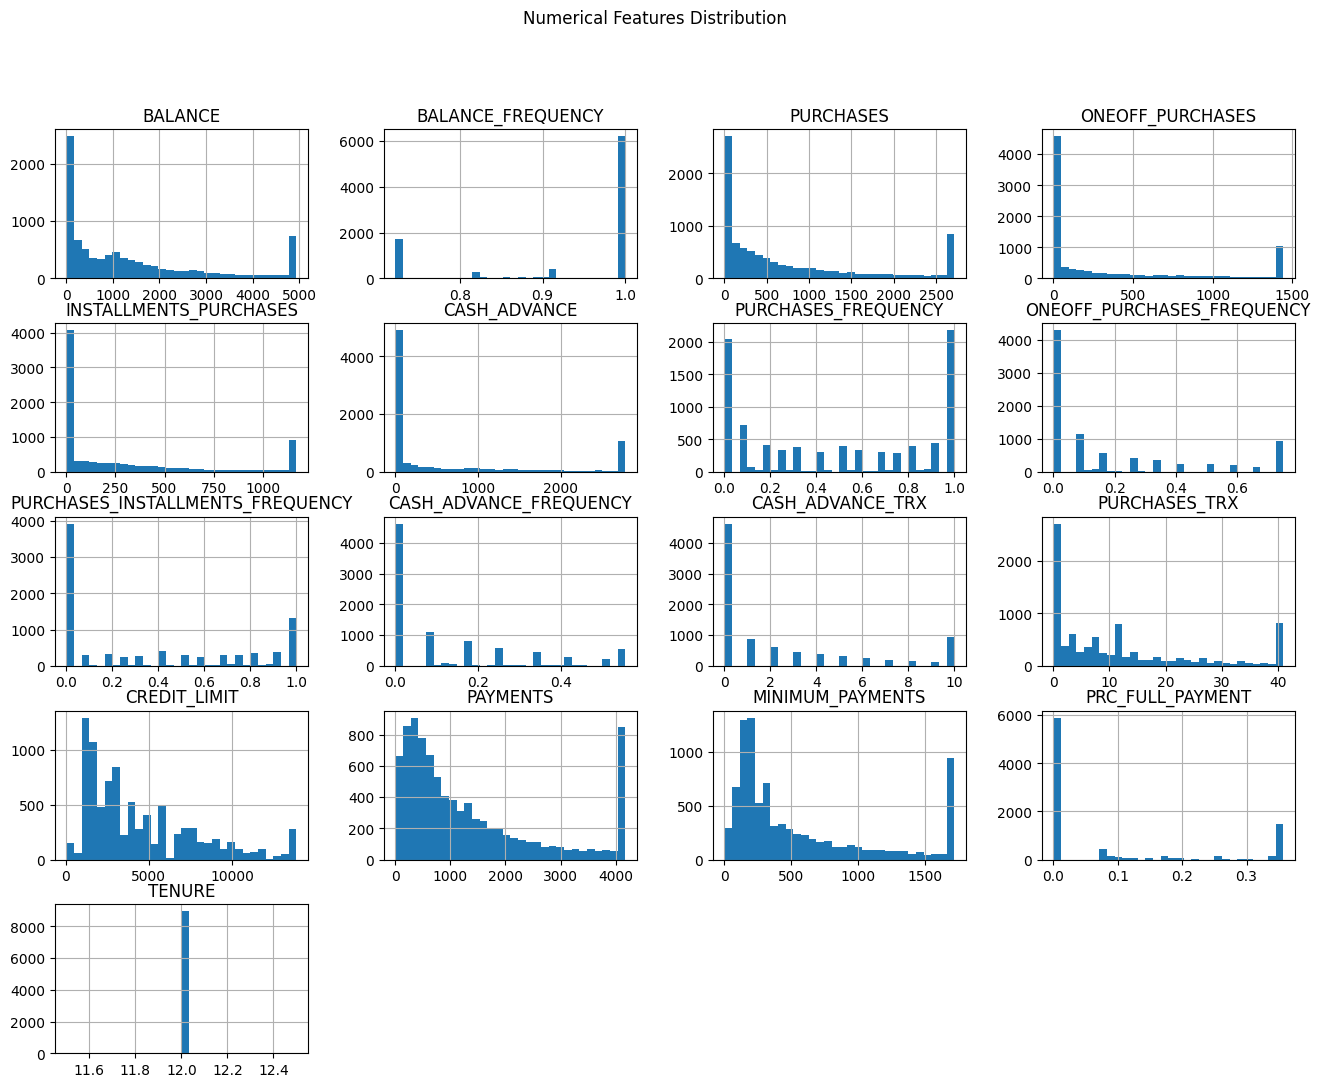

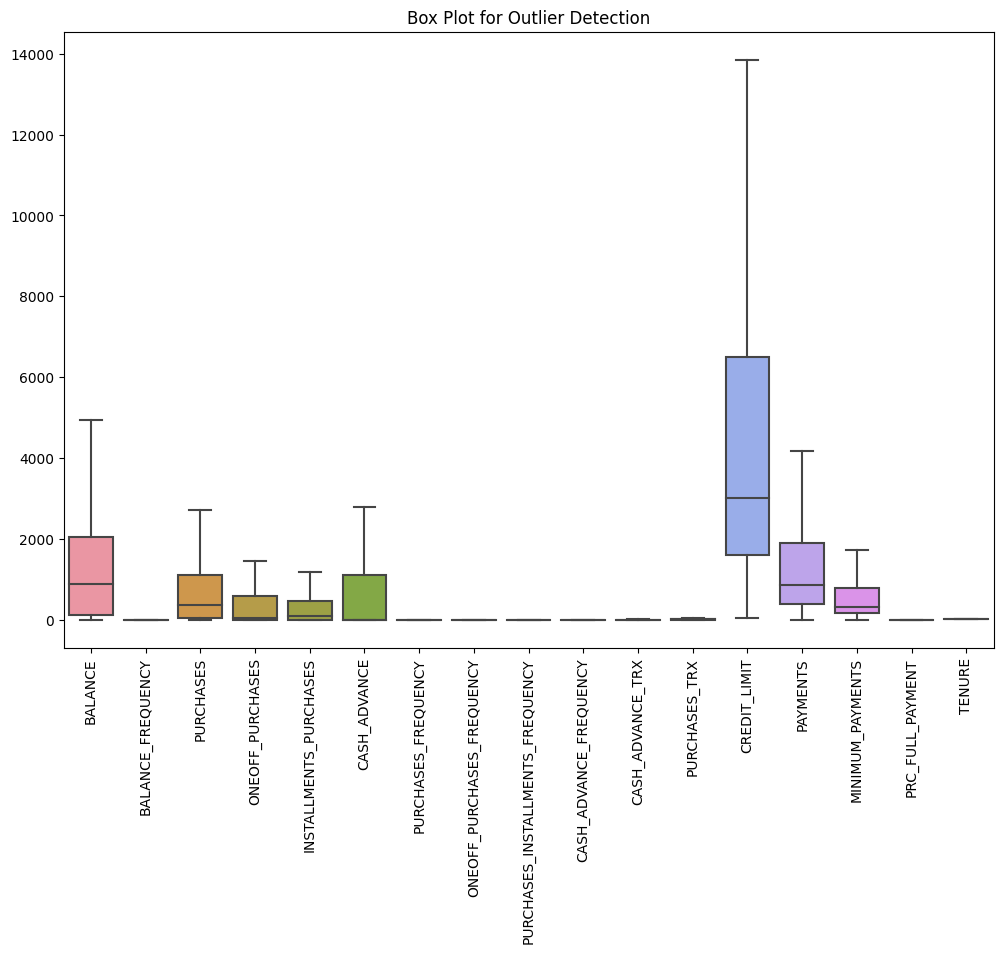

In [11]:
# Distribution of numerical features (e.g., histogram)
numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns].hist(figsize=(16, 12), bins=30)
plt.suptitle("Numerical Features Distribution")
plt.show()

# Box plot for detecting outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_columns])
plt.xticks(rotation=90)
plt.title("Box Plot for Outlier Detection")
plt.show()

**Analyzing the Box Plot and Feature Distribution**:

* The "CREDIT_LIMIT" feature exhibits the most significant outliers, which could indicate a segment of high-value customers.
* The presence of outliers in "BALANCE" and "PAYMENTS" might warrant further investigation to understand the factors contributing to these extreme values.
* The frequency based variables are heavily skewed to the left. Meaning that the majority of the people have very low frequency values.



# Correlation Matrix

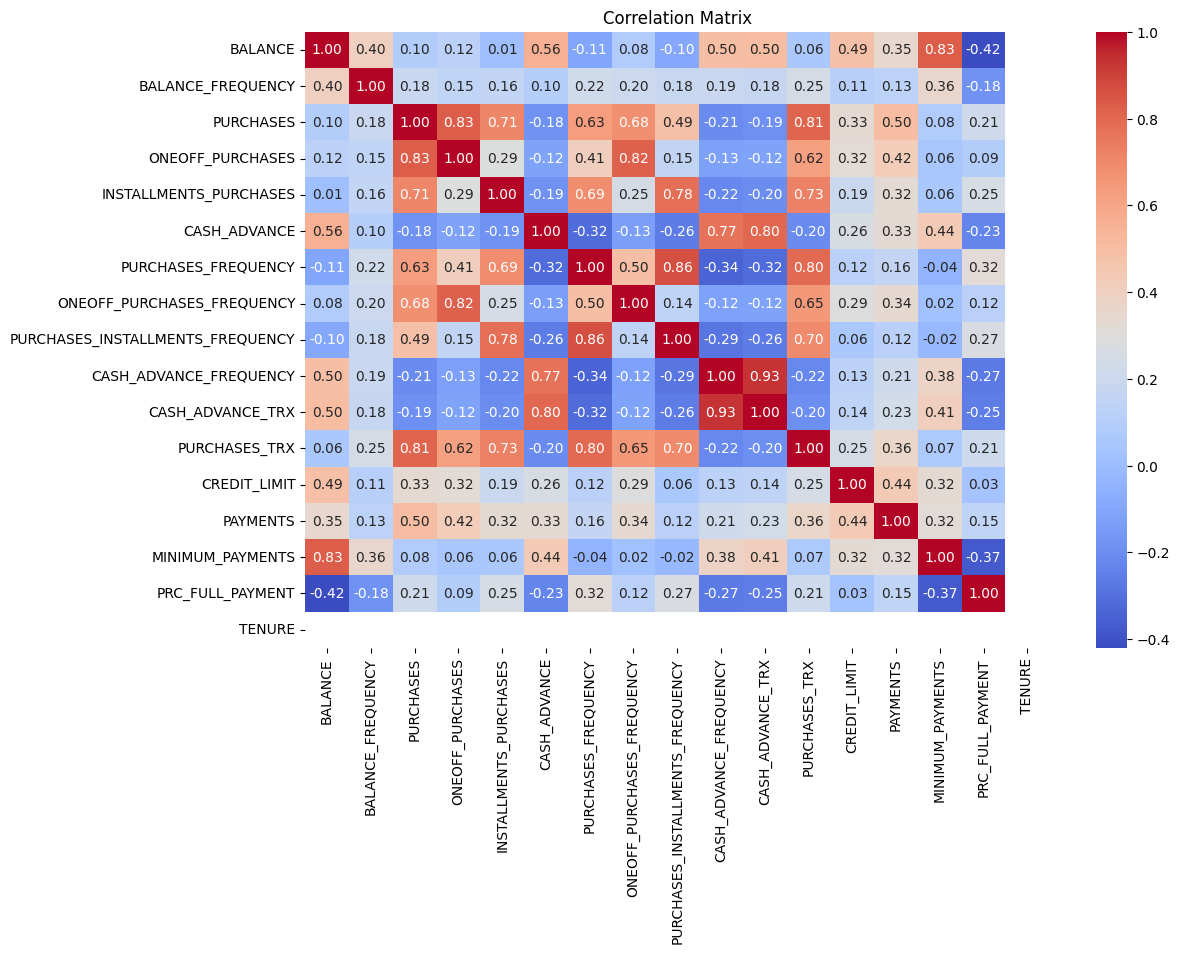

In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**Analyzing the Correlation Matrix**:

**High Positive Correlations (Red)**:
* PURCHASES and ONEOFF_PURCHASES (0.83): This strong positive correlation suggests that customers with high total purchases also tend to have high one-off purchases. This is logical, as one-off purchases are a component of total purchases.
* PURCHASES and INSTALLMENTS_PURCHASES(0.71): Similar to the above, this shows that people who make a lot of purchases also make a lot of installment purchases.
* CASH_ADVANCE and CASH_ADVANCE_TRX (0.93): This indicates that customers who take out larger cash advances also tend to have a higher number of cash advance transactions.
* PURCHASES_TRX and PURCHASES (0.81): People who make a lot of purchases, also have a high number of purchase transactions.
* PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY (0.86): People who have a high purchase frequency also have a high installment purchase frequency.
  
**High Negative Correlations (Blue):**
* MINIMUM_PAYMENTS and PRC_FULL_PAYMENT (-0.37): This implies that customers who make higher minimum payments are less likely to pay their balance in full.
* BALANCE_FREQUENCY and BALANCE (-0.40): This is a moderate negative correlation.
* CREDIT_LIMIT and BALANCE (-0.49): People with higher credit limits tend to have lower balances.
  
**Low Correlations (Near White):**
* Many of the frequency variables have very low correlations with other variables.
* TENURE variable has low correlations with most of the other variables.

# Scale Features

In [13]:
# Standardize numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert scaled data to DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
print("\nFirst Few Rows of Scaled Data:")
print(scaled_data.head())


First Few Rows of Scaled Data:
    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.877821          -1.021875  -0.729687         -0.692383   
1  1.178546          -0.202708  -0.838160         -0.692383   
2  0.718487           0.616459   0.040957          0.818320   
3  0.179623          -1.886552   0.866246          2.128108   
4 -0.372561           0.616459  -0.819967         -0.661121   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.505216     -0.673507            -0.806490   
1               -0.746029      2.115343            -1.221758   
2               -0.746029     -0.673507             1.269843   
3               -0.746029     -0.467401            -1.014125   
4               -0.746029     -0.673507            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.722749                         -0.707313   
1                   -0.722749                         -0.916995   
2  

# Dimensionality Reduction with PCA

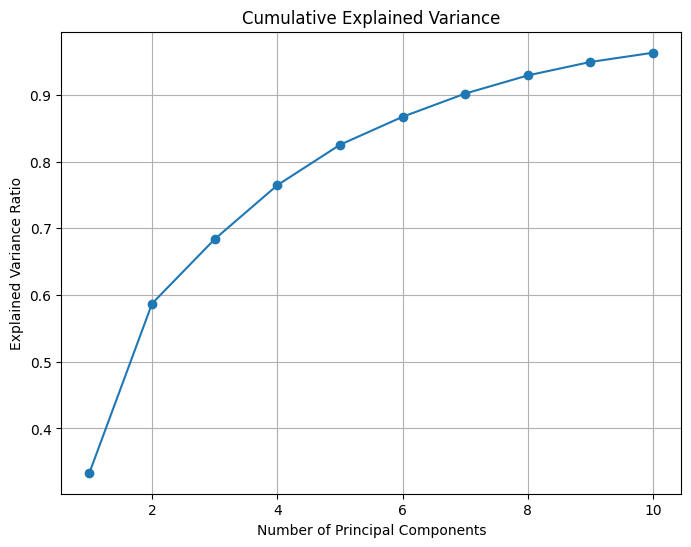

In [14]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)

# Plot Cumulative Explained Variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.grid()
plt.show()

**Analyzing Cumulative Explained Variance in PCA**:

* Rapid Increase in Early Components: The curve shows a steep increase in the explained variance with the first few principal components. This indicates that these initial components capture a significant portion of the data's variability.This tells us that the original high dimensional data has a lot of redundancy, and can be represented in a lower dimensional space.
  
* Diminishing Returns:As more components are added, the rate of increase in explained variance gradually decreases. This demonstrates the principle of diminishing returns – each subsequent component explains less and less of the remaining variance.This is shown by the curve flattening out as the number of principal components increases.

# Model Building and Training - K-Means Clustering

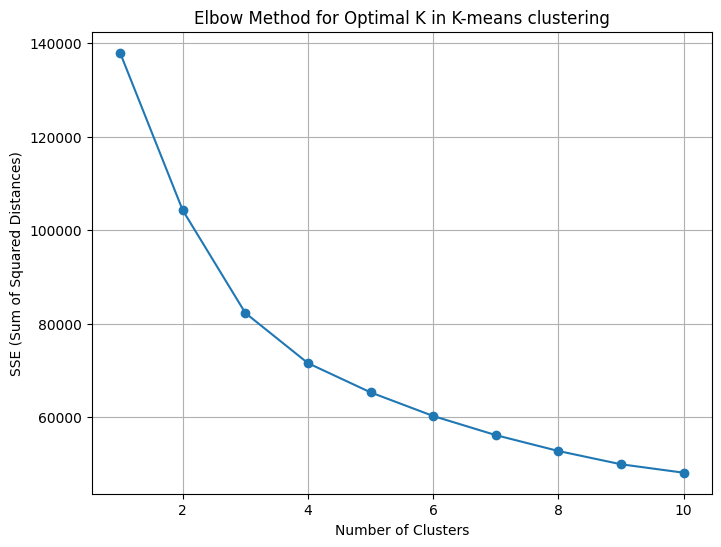

In [15]:
# K-Means Clustering
kmeans_kwargs = {"init": "k-means++", "n_init": 10, "max_iter": 300, "random_state": 42}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pca_data)
    sse.append(kmeans.inertia_)

# Elbow Plot for K-Means
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title("Elbow Method for Optimal K in K-means clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Sum of Squared Distances)")
plt.grid()
plt.show()

# Choose k=4 
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans_labels = kmeans.fit_predict(pca_data)

**Analyzing the plot of K-means clustering**:

* When K=1, the SSE is very high, indicating that all data points are far from a single centroid.
* As K increases, SSE decreases, showing that data points are closer to their respective cluster centroids.
* After K=4 the decent of the line is much less steep, meaning that the SSE is not decreasing as much as it was before.

# Model Binding and Training - Agglomerative Clustering

In [16]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels =  agg_clustering.fit_predict(pca_data)

# Model Binding and Training - DBSCAN Hyperparameter Selection

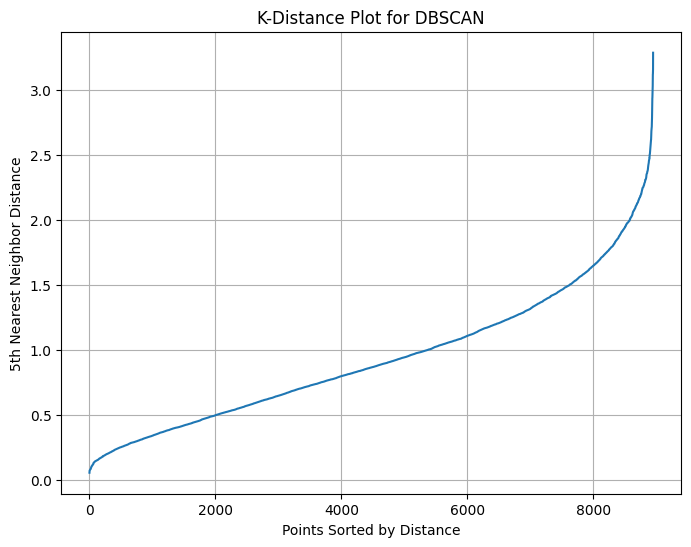

In [17]:
# Optimize DBSCAN Parameters
from sklearn.neighbors import NearestNeighbors

# Find the optimal `eps` value using the k-nearest neighbors method
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(pca_data)
distances, indices = neighbors_fit.kneighbors(pca_data)

# Plot the distances to find an "elbow"
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(pca_data)
distances, indices = neighbors_fit.kneighbors(pca_data)
distances = np.sort(distances[:, 4])
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title("K-Distance Plot for DBSCAN")
plt.xlabel("Points Sorted by Distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.grid()
plt.show()

# Perform DBSCAN (example eps=0.5)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_data)

**Analyzing the K-Distance Plot for DBSCAN**:

* The plot shows a sharp "elbow" shape, where the rate of increase in the 5th nearest neighbor distance significantly slows down.
* This "elbow" point is considered a good candidate for the eps parameter.
* In this case, the elbow seems to be around 0.2, so a suitable value for eps could be around 0.25 or 0.3.
* The "elbow" in the plot suggests that there exists a natural gap between the distances of points within clusters and the distances between points from different clusters.


# Add Cluster Evaluation Matrix

In [18]:
from sklearn.metrics import calinski_harabasz_score

# Clustering Evaluation
kmeans_silhouette = silhouette_score(pca_data, kmeans_labels)
agg_silhouette = silhouette_score(pca_data, agg_labels)
dbscan_silhouette = silhouette_score(pca_data, dbscan_labels)

print("K-Means Silhouette Score:", kmeans_silhouette)
print("Agglomerative Silhouette Score:", agg_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

kmeans_ch_score = calinski_harabasz_score(pca_data, kmeans_labels)
agg_ch_score = calinski_harabasz_score(pca_data, agg_labels)
dbscan_ch_score = calinski_harabasz_score(pca_data, dbscan_labels)

print("K-Means Calinski-Harabasz Score:", kmeans_ch_score)
print("Agglomerative Calinski-Harabasz Score:", agg_ch_score)
print("DBSCAN Calinski-Harabasz Score:", dbscan_ch_score)

# Add Cluster Labels to Data
data['KMeans_Cluster'] = kmeans_labels
data['Agg_Cluster'] = agg_labels
data['DBSCAN_Cluster'] = dbscan_labels

K-Means Silhouette Score: 0.22026804560637275
Agglomerative Silhouette Score: 0.16099023842409257
DBSCAN Silhouette Score: -0.3969615178182962
K-Means Calinski-Harabasz Score: 2766.3452884354283
Agglomerative Calinski-Harabasz Score: 2031.7784409641317
DBSCAN Calinski-Harabasz Score: 43.1145706596246


# Analyze Cluster Characteristics

In [19]:
# Analyze Cluster Characteristics
print("\nK-Means Cluster Characteristics:\n", data.groupby('KMeans_Cluster').mean())


K-Means Cluster Characteristics:
                     BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
KMeans_Cluster                                                                  
0                801.583008           0.887853   260.685141        206.460281   
1               1869.276404           0.979688  2212.033571       1180.697762   
2                483.142534           0.930135   710.578428        105.133946   
3               3090.174256           0.968095   278.557653        161.146832   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
KMeans_Cluster                                                              
0                            46.293148    362.356649             0.191128   
1                           683.893645    422.920616             0.898850   
2                           538.795437     98.338965             0.858250   
3                           100.733042   2140.313891             0.219167   

               

# Visualize Clusters

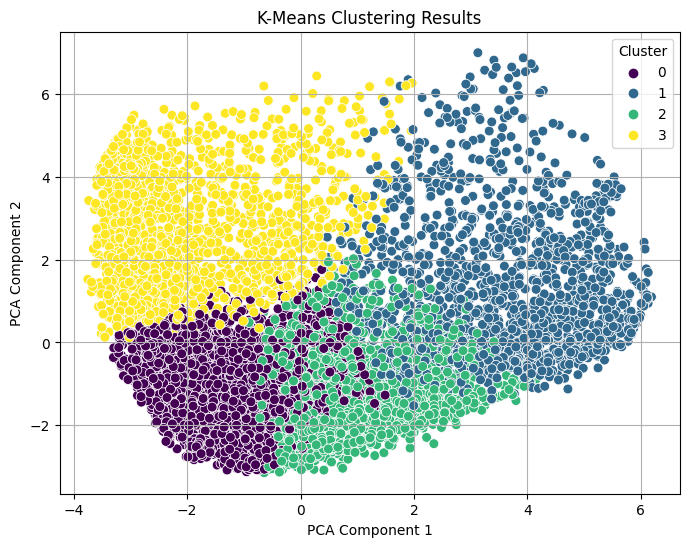

In [20]:
# Visualize Clusters 
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette="viridis", s=50)
plt.title("K-Means Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid()
plt.show()

**Analyzing K-Means Clustering Results**:

* The graph shows that the K-means algorithm has successfully separated the data into four visually distinct clusters. The clusters appear to be relatively well-defined, with minimal overlap.

* The separation of clusters in the PCA space suggests that the principal components are effective in capturing the underlying structure of the data

Overall, this graph demonstrates the successful application of K-means clustering to segment the data into four meaningful groups. The use of PCA allows for effective visualization of the clustering results in a 2D space.

# Conclusion

This project successfully demonstrated the application of unsupervised learning techniques for customer segmentation, specifically in analyzing credit card usage patterns. Through exploratory data analysis and preprocessing, the dataset was prepared for clustering, with dimensionality reduction via PCA ensuring efficiency while preserving key information. Three clustering algorithms—K-Means, Agglomerative Clustering, and DBSCAN—were implemented and evaluated using Silhouette Score and Calinski-Harabasz Index. Based on both metrics, K-Means emerged as the most effective clustering algorithm for this dataset, producing well-defined, separated, and compact clusters. Agglomerative clustering performed reasonably well but fell short of K-Means' performance, while DBSCAN exhibited the poorest results, likely due to its sensitivity to parameter settings and the nature of the data. The identified clusters provide actionable insights, such as grouping high-frequency spenders or low-balance users, which can guide targeted marketing strategies and personalized financial offerings. This project highlights the potential of unsupervised learning in uncovering hidden patterns and creating data-driven solutions for real-world business challenges.